In [1]:
import numpy as np
import matplotlib.pylab as plt
import scipy.signal
import time
import os

import spikeinterface.extractors as se
import spikeinterface.full as si
import spikeinterface.preprocessing as st #toolkit is not an available module... trying with preprocessing

import probeinterface as pi
from probeinterface.plotting import plot_probe, plot_probe_group

from pathlib import Path

%matplotlib  widget


n_cpus = os.cpu_count()
n_jobs = n_cpus - 4
print(n_jobs)
job_kwargs = dict(n_jobs=n_jobs, chunk_duration="1s", progress_bar=True)

npxpath = Path(r"E:\Ephys\PP_temp\E1_M6\NPXData\2024-01-23_19-19-08")
save2path = Path(os.path.join(npxpath, 'preprocessedData.zarr'))

16


In [2]:
if save2path.is_dir():
    recording_saved = si.read_zarr(save2path)    # reczarr = si.load_extractor(save2path) #achieve the same...

(<matplotlib.collections.PolyCollection at 0x28fe00852d0>, None)

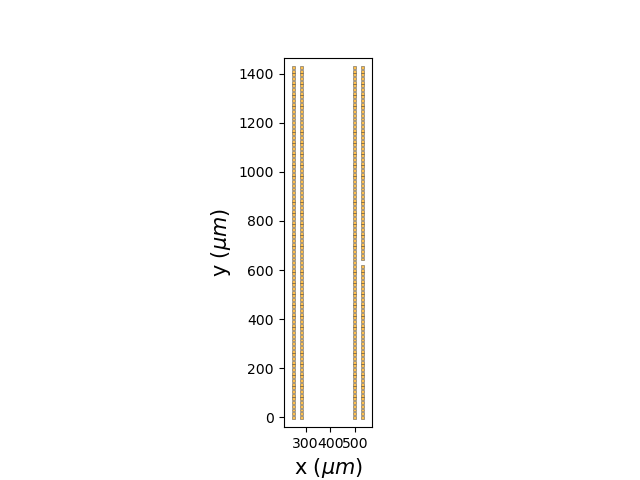

In [4]:
probe = recording_saved.get_probe()
#plot_probe(probe, with_contact_id=True)
plot_probe(probe,  title=False, with_contact_id=False)

In [7]:
df = probe.to_dataframe(complete=True)
save2path_df = Path(os.path.join(npxpath, 'channellist.csv'))
df.to_csv(save2path_df, index=False, header=True)

(<matplotlib.collections.PolyCollection at 0x28fe331fa90>,
 <matplotlib.collections.PolyCollection at 0x28fe33241c0>)

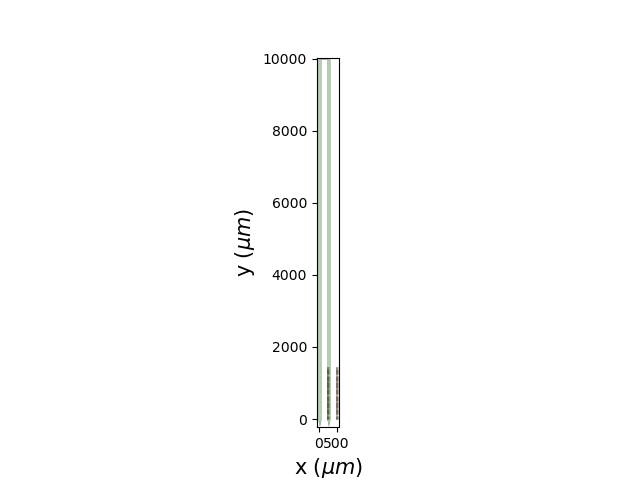

In [9]:
recording_raw = se.read_openephys(folder_path=npxpath, stream_id="0", load_sync_channel=False)
proberaw = recording_raw.get_probe()
#plot_probe(probe, with_contact_id=True)
plot_probe(proberaw,  title=False, with_contact_id=False)

In [12]:
probe.to_dataframe(complete=True)

,x,y,contact_shapes,width,shank_ids,contact_ids,device_channel_indices,si_units,plane_axis_x_0,plane_axis_x_1,plane_axis_y_0,plane_axis_y_1
0,250.0,0.0,square,12.0,1,s2e-7,0,um,1.0,0.0,0.0,1.0
1,282.0,0.0,square,12.0,1,s2e-6,1,um,1.0,0.0,0.0,1.0
2,250.0,15.0,square,12.0,1,s2e-5,2,um,1.0,0.0,0.0,1.0
3,282.0,15.0,square,12.0,1,s2e-4,3,um,1.0,0.0,0.0,1.0
4,250.0,30.0,square,12.0,1,s2e-3,4,um,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
378,532.0,675.0,square,12.0,2,s2e91,378,um,1.0,0.0,0.0,1.0
379,500.0,690.0,square,12.0,2,s2e92,379,um,1.0,0.0,0.0,1.0
380,532.0,690.0,square,12.0,2,s2e93,380,um,1.0,0.0,0.0,1.0
381,500.0,705.0,square,12.0,2,s2e94,381,um,1.0,0.0,0.0,1.0


In [10]:
proberaw.to_dataframe(complete=True)

,x,y,contact_shapes,width,shank_ids,contact_ids,device_channel_indices,si_units,plane_axis_x_0,plane_axis_x_1,plane_axis_y_0,plane_axis_y_1
0,500.0,720.0,square,12.0,2,s2e96,0,um,1.0,0.0,0.0,1.0
1,532.0,720.0,square,12.0,2,s2e97,1,um,1.0,0.0,0.0,1.0
2,500.0,735.0,square,12.0,2,s2e98,2,um,1.0,0.0,0.0,1.0
3,532.0,735.0,square,12.0,2,s2e99,3,um,1.0,0.0,0.0,1.0
4,500.0,750.0,square,12.0,2,s2e100,4,um,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
379,282.0,1395.0,square,12.0,1,s2e179,379,um,1.0,0.0,0.0,1.0
380,250.0,1410.0,square,12.0,1,s2e180,380,um,1.0,0.0,0.0,1.0
381,282.0,1410.0,square,12.0,1,s2e181,381,um,1.0,0.0,0.0,1.0
382,250.0,1425.0,square,12.0,1,s2e182,382,um,1.0,0.0,0.0,1.0
